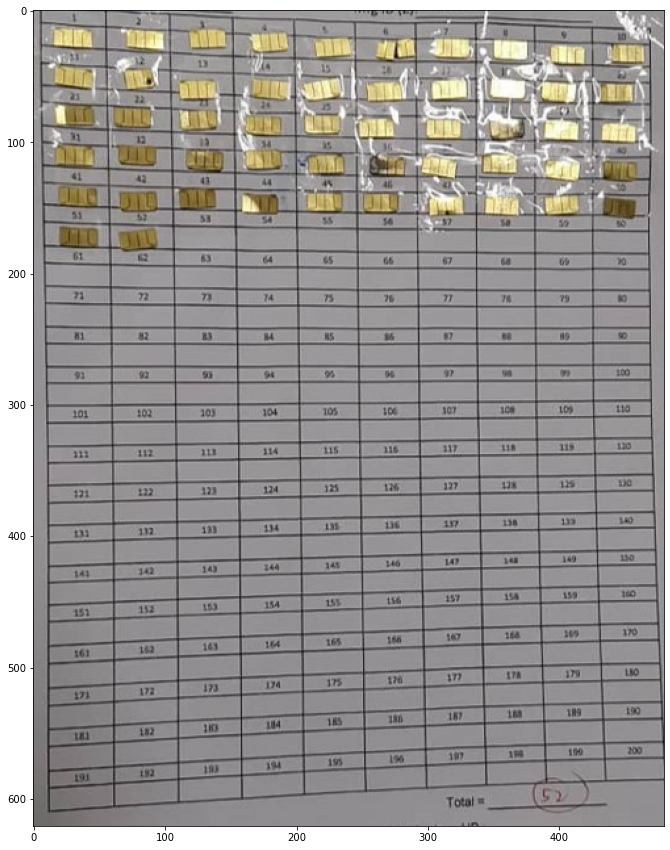

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('dataset/train_data/train_images/1003.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize = (15,15))
plt.imshow(image)

## Remove glare 
Source code: http://www.amphident.de/en/blog/preprocessing-for-automatic-pattern-identification-in-wildlife-removing-glare.html

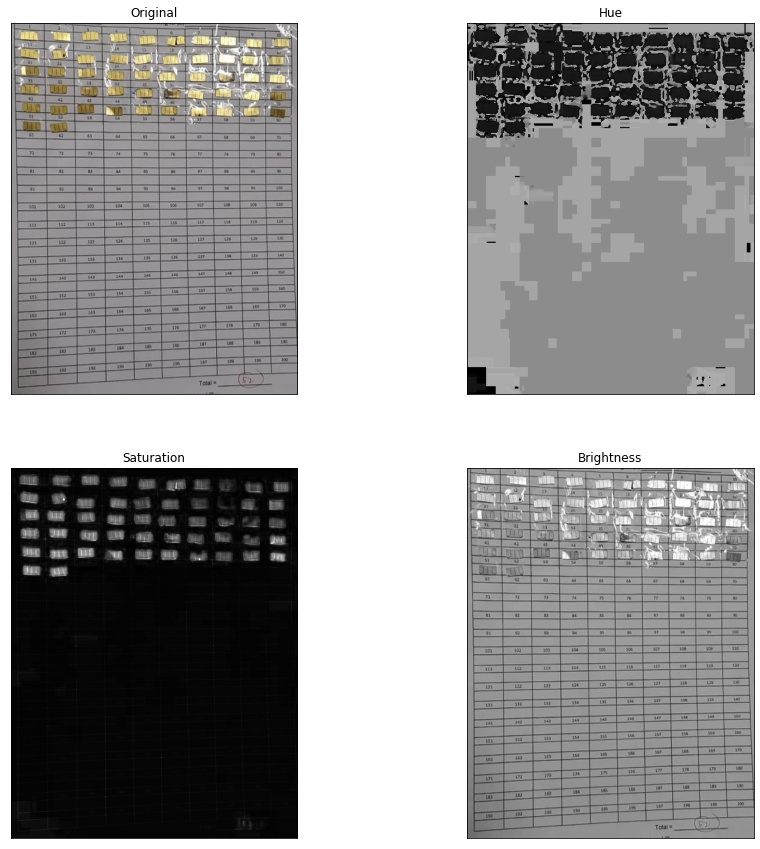

In [2]:
h, s, v = cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)) # split into HSV components

def _imshow(I, theTitle=None):
    if len(I.shape) == 3:
        plt.imshow(I)
    else:
        if I.min() == 0 and I.max() == 1:
            plt.imshow(I, cmap="gray")
        else:
            plt.imshow(I, cmap="gray",vmin=0,vmax=255)
    plt.xticks([])
    plt.yticks([])
    if theTitle:
        plt.title(theTitle)

plt.figure(figsize = (15,15))
plt.subplot(2,2,1); _imshow(image, "Original")
plt.subplot(2,2,2); _imshow(h, "Hue")
plt.subplot(2,2,3); _imshow(s, "Saturation")
plt.subplot(2,2,4); _imshow(v, "Brightness")

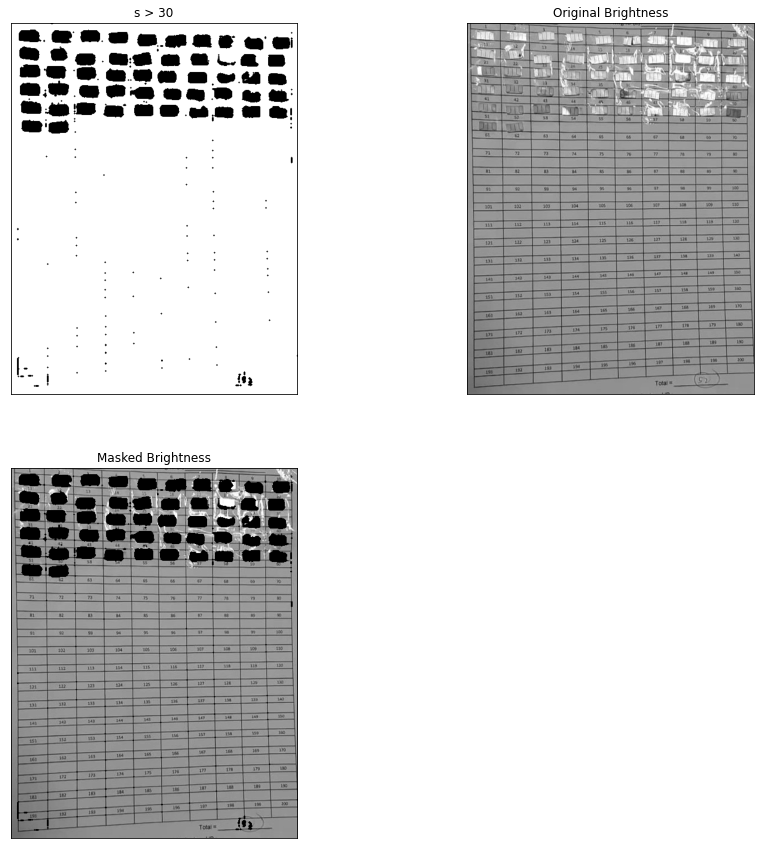

In [3]:
nonSat = s < 30 # Find all pixels that are not very saturated

# Slightly decrease the area of the non-satuared pixels by a erosion operation.
disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
nonSat = cv2.erode(nonSat.astype(np.uint8), disk)

# Set all brightness values, where the pixels are still saturated to 0.
v2 = v.copy()
v2[nonSat == 0] = 0

plt.figure(figsize = (15,15))
plt.subplot(2,2,1); _imshow(nonSat, "s > 30")
plt.subplot(2,2,2); _imshow(v, "Original Brightness")
plt.subplot(2,2,3); _imshow(v2, "Masked Brightness")

# An image can only contain glare, when its color is not saturated and it has a high brightness. Since light 
# reflections are white, any pixel containing glare must have no saturation (since white has no color or saturation). 

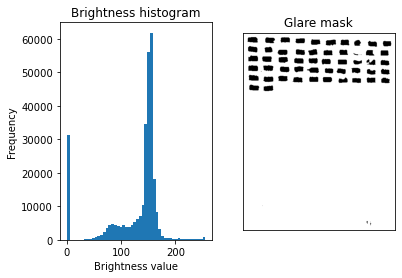

In [4]:
plt.subplot(1,2,1); plt.hist(v2.flatten(), bins=50)  # draw the histogram of pixel brightnesses
plt.xlabel("Brightness value")
plt.ylabel("Frequency")
plt.title("Brightness histogram")

glare = v2 > 100 # filter out very bright pixels
# Slightly increase the area for each pixel
glare = cv2.dilate(glare.astype(np.uint8), disk);  
glare = cv2.dilate(glare.astype(np.uint8), disk);

plt.subplot(1,2,2); _imshow(glare);
plt.title("Glare mask")

## Remove shadow
Source code: https://medium.com/arnekt-ai/shadow-removal-with-open-cv-71e030eadaf5

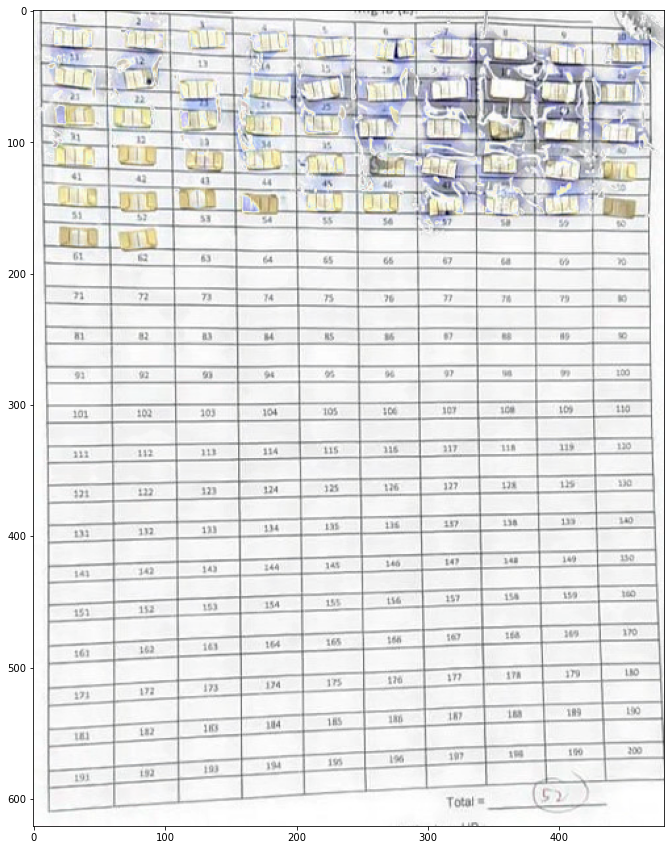

In [5]:
def shadow_remove(img):
    rgb_planes = cv2.split(img)
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((5,5), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        result_norm_planes.append(norm_img)
    shadow_removed = cv2.merge(result_norm_planes)
    return shadow_removed

shad = shadow_remove(image)
plt.figure(figsize = (15,15))
plt.imshow(shad)